# ホテリング理論
    

## 1. データのパターンを定量的に評価

- データセットの平均値，分散を計算する
$$
\widehat {\mu } = \frac{1}{N}\sum_{n=1}^{N}x^{(n)} \\
\widehat {\sigma}^{2} = \frac{1}{N}\sum_{n=1}^{N}(x^{(n)} - \widehat {\mu } )^{2} 
$$
    
    
## 2. 検証するデータxの異常度を計算

- 異常度は検証するデータの平均値からのズレを分散で割り，二乗したもの
- 分子はデータの平均値からのズレで，異常ならば大きくなる
- 分母は分散.分散が大きい時は大きめの異常もおおめにみるという考え方
- この結果はF統計量とも呼ばれる
    
$$
a(x') =\biggl( \frac{x' - \widehat {\mu }}{\widehat {\sigma}}\biggr)^{2}
$$


## 3. 異常判定の闘値を設定

- この理論では，データの分布が正規分布に従っているを仮定する．
    
$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left(-\frac{(x - \mu)^2}
{2\sigma^2} \right) \hspace{20px} (-\infty < x < \infty)
$$
    

- 2.で示した異常度の計算結果はデータ数が大きければ，自由度1のカイ二乗分布に従うと証明されている．(証明は省く）
    
- このカイ二乗分布の確率発生確率5%(有意水準？）の閾値を超えたデータは，異常と判断する

# 実験
- 可視化の資料で正規性を確認できた，八方向の残差データを利用する

In [3]:
import numpy as np
import pandas as pd

data = []
for i in range(1, 51):
    tmp_data = pd.read_csv('fresh_aged_ieice/s'+str(i)+'.csv', header=None).values
    data.append(tmp_data)
for i in range(1, 3):
    tmp_data = pd.read_csv('fresh_aged_ieice/s'+str(i)+'_aged.csv', header=None).values
    data.append(tmp_data)
data = np.array(data)

check = []
for i in range(148):
    for j in range(33):
        if data[0, i, j] == 0:
            check.append([i,j])
for i in range(52):
    for j in range(148):
        for k in range(33):
            if [j,k] in check:
                data[i, j, k] = 0

tmp_x = [-1, 0, 1, 1, 1, 0, -1, -1]
tmp_y = [-1, -1, -1, 0, 1, 1, 1, 0]
residual_data = np.zeros_like(data)
for i in range(52):
    for j in range(148):
        for k in range(33):
            if data[i, j, k] != 0:
                data_list = []
                for l in range(8):
                    next_y = j + tmp_y[l]
                    next_x = k + tmp_x[l]
                    if 0 <= next_y < 148 and 0 <= next_x < 33 and data[i, next_y, next_x] != 0:
                        data_list.append(data[i, next_y, next_x])
                data_mean = np.mean(np.array(data_list))
                residual_data[i, j, k] = abs(data[i, j, k] - data_mean)

tmp_1 = []
for i in range(52):
    tmp_2 = []
    for j in range(148):
        for k in range(33):
            if [j,k] in check:
                continue
            else:
                tmp_2.append(residual_data[i, j, k])
    tmp_1.append(tmp_2)
data = np.array(tmp_1)

[合計値]


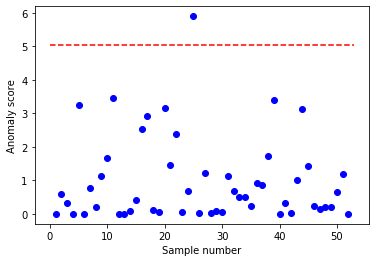

25


In [12]:
from statistics import mean, variance
from scipy import stats
import matplotlib.pyplot as plt

sum_list = []
for i in data:
    sum_list.append(np.sum(i))
    
# 標本平均
mn = mean(sum_list)

# 標本分散
vari = variance(sum_list)

# 異常度
anomaly_scores = []
for x in sum_list:
    anomaly_score = (x - mn)**2 / vari
    anomaly_scores.append(anomaly_score)

# カイ二乗分布による5%水準の閾値
threshold = stats.chi2.interval(0.95, 1)[1]

print('[合計値]')
# 結果の描画
num = np.arange(1, 53)
plt.plot(num, anomaly_scores, "o", color = "b")
plt.plot([0,53],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()


for i, j in enumerate(anomaly_scores):
    if j >= threshold:
        print(i+1)

[平均値]


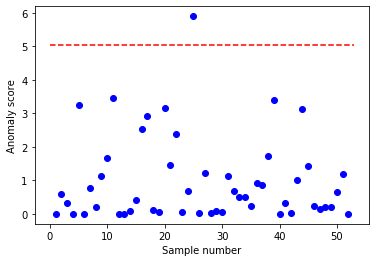

25


In [11]:
mean_list = []
for i in data:
    mean_list.append(np.mean(i))
    
# 標本平均
mn = mean(mean_list)

# 標本分散
vari = variance(mean_list)

# 異常度
anomaly_scores = []
for x in mean_list:
    anomaly_score = (x - mn)**2 / vari
    anomaly_scores.append(anomaly_score)

# カイ二乗分布による5%水準の閾値
threshold = stats.chi2.interval(0.95, 1)[1]

print('[平均値]')
# 結果の描画
num = np.arange(1, 53)
plt.plot(num, anomaly_scores, "o", color = "b")
plt.plot([0,53],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()


for i, j in enumerate(anomaly_scores):
    if j >= threshold:
        print(i+1)

# 実験結果

- 失敗した
- 経年劣化した50,51は異常と判定されなかった